In [239]:
import cv2
import numpy as np
import random

def embed_watermark(image_path, text, key, alpha):
    # Load the input image
    img = cv2.imread(image_path)

    # Convert the text to binary
    binary_text = ''.join(format(ord(char), '08b') for char in text)
    print("this is the watermark as binary text ",binary_text)
    # Divide the image into non-overlapping blocks of a fixed size
    block_size = 8
    rows, cols, channels = img.shape
    num_blocks_x = cols // block_size
    print("number of blocks in x axis",num_blocks_x)
    num_blocks_y = rows // block_size
    print("number of blocks in y axis ",num_blocks_y)
    # Embed the binary text into the low-frequency coefficients of each block using DCT
    np.random.seed(key)
    for y in range(num_blocks_y):
        for x in range(num_blocks_x):
            block = img[y*block_size:(y+1)*block_size, x*block_size:(x+1)*block_size]
            block = cv2.cvtColor(block, cv2.COLOR_BGR2YCrCb)
            y_channel = block[:, :, 0]
            dct = cv2.dct(np.float32(y_channel))
            low_freq_indices = np.argwhere(np.abs(dct) <= alpha)
            print("low frequency indices",low_freq_indices)
            np.random.shuffle(low_freq_indices)
            text_index = 0
            for index in low_freq_indices:
                if text_index == len(binary_text):
                    break
                if dct[index[0], index[1]] > 0:
                    if binary_text[text_index] == '1':
                        dct[index[0], index[1]] -= 1
                    else:
                        dct[index[0], index[1]] += 1
                else:
                    if binary_text[text_index] == '1':
                        dct[index[0], index[1]] += 1
                    else:
                        dct[index[0], index[1]] -= 1
                text_index += 1
            print("binary text",binary_text)
            print("dct[index[0], index[1]]",dct[index[0], index[1]])
            y_channel_watermarked = cv2.idct(dct)
            block[:, :, 0] = y_channel_watermarked
            block = cv2.cvtColor(block, cv2.COLOR_YCrCb2BGR)
            img[y*block_size:(y+1)*block_size, x*block_size:(x+1)*block_size] = block

    # Save the watermarked image
    cv2.imwrite('watermarked_image2.png', img)
    cv2.imshow('Watermarked Image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return img

def extract_watermark(image_path, key, alpha,binary_text_len):
    # Load the watermarked image
    img = cv2.imread(image_path)
    cv2.imshow('Watermarked Image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    block_size = 8
    rows, cols, channels = img.shape
    num_blocks_x = cols // block_size
    print("number of blocks in x axis",num_blocks_x)
    num_blocks_y = rows // block_size
    print("number of blocks in y axis ",num_blocks_y)
    # Extract the binary text from the low-frequency coefficients of each block using DCT
    binary_text = ''
    np.random.seed(key)
    for y in range(num_blocks_y):
        for x in range(num_blocks_x):
            block = img[y*block_size:(y+1)*block_size, x*block_size:(x+1)*block_size]
            block = cv2.cvtColor(block, cv2.COLOR_BGR2YCrCb)
            y_channel = block[:, :, 0]
            dct = cv2.dct(np.float32(y_channel))
            low_freq_indices = np.argwhere(np.abs(dct) <= alpha)
            print("low frequency indices",low_freq_indices)
            np.random.shuffle(low_freq_indices)
            text_index = 0
            for index in low_freq_indices:
                print("dct[index[0], index[1]]",dct[index[0], index[1]])
                if binary_text_len == len(binary_text):
                    break
                if dct[index[0], index[1]] % 2 <= 1:                
                    print('text_index 11',text_index)
                    binary_text += '0'
                else:
                    print('text_index 22',text_index)
                    binary_text += '1'
                text_index += 1
        print('text_index final',text_index)
        print('binary_text final ',len(binary_text))
# Convert the binary text to ASCII
#     text=''
#     print(binary_text)
#     for i in range(0, len(binary_text), 8):
#         byte = binary_text[i:i+8]
#         text += chr(int(byte, 2))
    return binary_text

In [260]:
img=embed_watermark('PeppersRGB.bmp','HayaAndMaria',12345,1)

this is the watermark as binary text  010010000110000101111001011000010100000101101110011001000100110101100001011100100110100101100001
number of blocks in x axis 64
number of blocks in y axis  64
low frequency indices [[0 3]
 [0 4]
 [0 5]
 [1 1]
 [1 2]
 [2 1]
 [2 4]
 [2 5]
 [3 3]
 [3 4]
 [3 6]
 [4 0]
 [4 2]
 [4 7]
 [5 1]
 [5 3]
 [5 5]
 [5 7]
 [6 1]
 [6 7]
 [7 1]
 [7 4]
 [7 6]
 [7 7]]
binary text 010010000110000101111001011000010100000101101110011001000100110101100001011100100110100101100001
dct[index[0], index[1]] 0.4461115
low frequency indices [[1 7]
 [2 4]
 [2 7]
 [3 2]
 [3 3]
 [3 5]
 [4 2]
 [4 3]
 [4 5]
 [5 0]
 [5 1]
 [5 2]
 [5 3]
 [5 4]
 [5 5]
 [6 1]
 [6 3]
 [6 4]
 [6 5]
 [6 6]
 [6 7]
 [7 1]
 [7 2]
 [7 3]
 [7 5]
 [7 6]
 [7 7]]
binary text 010010000110000101111001011000010100000101101110011001000100110101100001011100100110100101100001
dct[index[0], index[1]] -0.90106636
low frequency indices [[0 4]
 [1 1]
 [1 2]
 [2 1]
 [2 2]
 [2 4]
 [3 1]
 [3 2]
 [3 4]
 [3 5]
 [4 1]
 [4 2]
 [4 4]


low frequency indices [[1 7]
 [2 1]
 [2 4]
 [3 4]
 [3 5]
 [4 7]
 [5 0]
 [5 5]
 [5 6]
 [5 7]
 [6 2]
 [6 3]
 [6 5]
 [7 3]
 [7 5]]
binary text 010010000110000101111001011000010100000101101110011001000100110101100001011100100110100101100001
dct[index[0], index[1]] -1.2521707
low frequency indices [[0 4]
 [0 6]
 [1 2]
 [3 4]
 [4 3]
 [4 5]
 [4 7]
 [5 3]
 [5 4]
 [6 0]
 [6 7]
 [7 0]
 [7 2]
 [7 3]
 [7 4]
 [7 5]]
binary text 010010000110000101111001011000010100000101101110011001000100110101100001011100100110100101100001
dct[index[0], index[1]] 0.8284675
low frequency indices [[0 6]
 [2 3]
 [4 0]
 [4 1]
 [5 2]
 [5 4]
 [5 5]
 [6 3]
 [7 7]]
binary text 010010000110000101111001011000010100000101101110011001000100110101100001011100100110100101100001
dct[index[0], index[1]] -1.182071
low frequency indices [[0 4]
 [0 7]
 [1 4]
 [1 5]
 [1 6]
 [1 7]
 [3 0]
 [3 1]
 [3 2]
 [4 0]
 [4 1]
 [4 2]
 [4 4]
 [5 0]
 [5 1]
 [5 5]
 [6 0]
 [6 6]
 [7 2]
 [7 5]
 [7 6]]
binary text 010010000110000101111001011000010100000

binary text 010010000110000101111001011000010100000101101110011001000100110101100001011100100110100101100001
dct[index[0], index[1]] -0.95656276
low frequency indices [[0 4]
 [0 6]
 [1 2]
 [1 4]
 [1 5]
 [2 1]
 [2 2]
 [2 6]
 [3 3]
 [3 4]
 [3 6]
 [3 7]
 [4 1]
 [4 2]
 [5 5]
 [6 2]
 [6 4]
 [6 5]
 [7 5]
 [7 7]]
binary text 010010000110000101111001011000010100000101101110011001000100110101100001011100100110100101100001
dct[index[0], index[1]] -0.54549134
low frequency indices [[0 5]
 [0 7]
 [1 0]
 [1 4]
 [1 6]
 [2 0]
 [2 2]
 [2 4]
 [2 7]
 [3 1]
 [3 3]
 [3 5]
 [3 6]
 [4 0]
 [4 3]
 [4 4]
 [4 5]
 [5 4]
 [5 6]
 [6 0]
 [6 2]
 [6 4]
 [6 5]
 [7 0]
 [7 2]
 [7 3]
 [7 4]
 [7 5]
 [7 6]
 [7 7]]
binary text 010010000110000101111001011000010100000101101110011001000100110101100001011100100110100101100001
dct[index[0], index[1]] -1.4105691
low frequency indices [[0 1]
 [0 3]
 [0 5]
 [0 7]
 [1 0]
 [1 1]
 [2 3]
 [2 4]
 [2 5]
 [2 6]
 [2 7]
 [3 1]
 [3 2]
 [3 3]
 [3 6]
 [4 6]
 [5 5]
 [5 6]
 [6 0]
 [6 1]
 [6 2]
 

binary text 010010000110000101111001011000010100000101101110011001000100110101100001011100100110100101100001
dct[index[0], index[1]] 1.2757127
low frequency indices [[0 6]
 [1 3]
 [1 6]
 [2 4]
 [3 1]
 [3 4]
 [4 1]
 [4 4]
 [4 6]
 [5 3]
 [5 6]
 [6 6]
 [6 7]
 [7 2]]
binary text 010010000110000101111001011000010100000101101110011001000100110101100001011100100110100101100001
dct[index[0], index[1]] 1.6948986
low frequency indices [[0 4]
 [1 3]
 [1 4]
 [1 6]
 [1 7]
 [2 0]
 [2 6]
 [3 1]
 [3 7]
 [4 1]
 [4 3]
 [4 4]
 [4 6]
 [4 7]
 [5 0]
 [5 3]
 [5 6]
 [5 7]
 [7 3]
 [7 7]]
binary text 010010000110000101111001011000010100000101101110011001000100110101100001011100100110100101100001
dct[index[0], index[1]] 0.6365418
low frequency indices [[1 7]
 [2 5]
 [2 6]
 [3 6]
 [4 5]
 [4 7]
 [5 3]
 [5 7]
 [6 2]
 [6 4]
 [6 5]
 [6 6]
 [7 0]
 [7 1]
 [7 3]
 [7 4]
 [7 5]
 [7 7]]
binary text 010010000110000101111001011000010100000101101110011001000100110101100001011100100110100101100001
dct[index[0], index[1]] -0.12

low frequency indices [[0 4]
 [1 0]
 [1 6]
 [1 7]
 [4 4]
 [5 1]
 [5 7]
 [7 1]
 [7 3]
 [7 6]]
binary text 010010000110000101111001011000010100000101101110011001000100110101100001011100100110100101100001
dct[index[0], index[1]] -0.44709688
low frequency indices [[3 2]
 [4 1]
 [4 2]
 [4 3]
 [4 4]
 [5 4]
 [5 7]
 [6 0]
 [7 0]
 [7 1]
 [7 2]]
binary text 010010000110000101111001011000010100000101101110011001000100110101100001011100100110100101100001
dct[index[0], index[1]] 0.9837245
low frequency indices [[1 4]
 [1 7]
 [2 3]
 [4 0]
 [4 2]
 [4 6]
 [4 7]
 [5 5]
 [5 6]
 [6 0]
 [6 2]
 [6 5]
 [6 7]
 [7 4]
 [7 6]]
binary text 010010000110000101111001011000010100000101101110011001000100110101100001011100100110100101100001
dct[index[0], index[1]] -1.6412413
low frequency indices [[2 5]
 [4 6]
 [5 3]
 [6 0]
 [6 5]
 [6 6]
 [7 0]
 [7 2]
 [7 5]
 [7 7]]
binary text 010010000110000101111001011000010100000101101110011001000100110101100001011100100110100101100001
dct[index[0], index[1]] 0.22944194
low freque

binary text 010010000110000101111001011000010100000101101110011001000100110101100001011100100110100101100001
dct[index[0], index[1]] 1.6850128
low frequency indices [[1 7]
 [2 0]
 [4 4]
 [5 0]
 [5 1]
 [7 5]
 [7 6]]
binary text 010010000110000101111001011000010100000101101110011001000100110101100001011100100110100101100001
dct[index[0], index[1]] -1.5785985
low frequency indices [[1 6]
 [6 1]
 [6 6]
 [6 7]]
binary text 010010000110000101111001011000010100000101101110011001000100110101100001011100100110100101100001
dct[index[0], index[1]] 1.4881792
low frequency indices [[2 1]
 [2 3]
 [3 7]
 [5 4]
 [6 0]
 [6 2]
 [7 6]]
binary text 010010000110000101111001011000010100000101101110011001000100110101100001011100100110100101100001
dct[index[0], index[1]] -1.0521157
low frequency indices [[1 5]
 [4 7]
 [5 2]
 [5 7]
 [7 2]]
binary text 010010000110000101111001011000010100000101101110011001000100110101100001011100100110100101100001
dct[index[0], index[1]] -0.37823987
low frequency indices [[1 6]

In [261]:
watermark_text='HayaAndMaria'
binary_text = ''.join(format(ord(char), '08b') for char in watermark_text)
print("Watermark: ",binary_text)
print(len(binary_text))

Watermark:  010010000110000101111001011000010100000101101110011001000100110101100001011100100110100101100001
96


In [262]:
extracted_text=extract_watermark('watermarked_image2.png',12345,1,96)

number of blocks in x axis 64
number of blocks in y axis  64
low frequency indices [[0 5]
 [1 2]
 [2 4]
 [2 5]
 [3 1]
 [3 3]
 [3 4]
 [3 6]
 [4 5]
 [5 1]
 [5 3]
 [7 6]
 [7 7]]
dct[index[0], index[1]] 0.34873092
text_index 11 0
dct[index[0], index[1]] 0.7737689
text_index 11 1
dct[index[0], index[1]] -0.591459
text_index 22 2
dct[index[0], index[1]] 0.44514653
text_index 11 3
dct[index[0], index[1]] 0.23307301
text_index 11 4
dct[index[0], index[1]] 0.97956795
text_index 11 5
dct[index[0], index[1]] 0.7580858
text_index 11 6
dct[index[0], index[1]] -0.18795727
text_index 22 7
dct[index[0], index[1]] -0.13697575
text_index 22 8
dct[index[0], index[1]] 0.9107414
text_index 11 9
dct[index[0], index[1]] -0.60468674
text_index 22 10
dct[index[0], index[1]] -0.17412819
text_index 22 11
dct[index[0], index[1]] 0.20775625
text_index 11 12
low frequency indices [[1 7]
 [2 7]
 [3 2]
 [3 7]
 [4 3]
 [5 0]
 [5 2]
 [5 5]
 [6 1]
 [6 2]
 [6 4]
 [6 6]
 [7 3]
 [7 4]
 [7 5]
 [7 7]]
dct[index[0], index[1]] 

low frequency indices [[1 2]
 [3 0]
 [3 2]
 [3 3]
 [3 4]
 [5 7]
 [6 2]
 [6 6]
 [7 2]
 [7 5]]
dct[index[0], index[1]] 0.5332985
low frequency indices [[0 7]
 [1 7]
 [2 3]
 [3 6]
 [4 0]
 [4 6]
 [5 2]
 [5 4]
 [5 6]
 [6 7]
 [7 2]
 [7 6]]
dct[index[0], index[1]] -0.6361283
low frequency indices [[0 7]
 [1 6]
 [2 5]
 [3 0]
 [3 2]
 [3 3]
 [3 4]
 [4 2]
 [4 4]
 [5 4]
 [5 5]
 [5 6]
 [6 6]
 [7 6]]
dct[index[0], index[1]] 0.20807879
low frequency indices [[1 3]
 [1 6]
 [3 1]
 [3 2]
 [3 3]
 [3 6]
 [3 7]
 [4 3]
 [4 6]
 [4 7]
 [5 5]
 [6 3]
 [6 4]
 [6 7]
 [7 1]
 [7 4]]
dct[index[0], index[1]] -0.65281594
low frequency indices [[4 6]
 [5 2]
 [6 1]
 [7 4]]
dct[index[0], index[1]] 0.26098245
low frequency indices [[0 7]
 [4 6]
 [7 7]]
dct[index[0], index[1]] 0.39545697
low frequency indices [[2 5]
 [3 6]
 [4 5]
 [5 1]
 [5 7]
 [7 1]]
dct[index[0], index[1]] 0.8715963
low frequency indices [[3 0]]
dct[index[0], index[1]] 0.8383744
low frequency indices [[1 1]
 [4 7]]
dct[index[0], index[1]] -0.87701595
low

In [263]:
print("Extracted:",extracted_text)

Extracted: 001000011011011111011110111100001000101001010001101011011000001011111100101010100101111011110110


PSNR

In [164]:
import numpy as np
from PIL import Image

def calculate_psnr(img1_path, img2_path):
    # Open images and convert to numpy arrays
    img1 = np.array(Image.open(img1_path))
    img2 = np.array(Image.open(img2_path))
    
    # Ensure the images are the same size
    if img1.shape != img2.shape:
        raise ValueError('Images must be the same size')
    
    # Calculate the mean squared error
    mse = np.mean((img1 - img2)**2)
    
    # Calculate the maximum possible pixel value
    max_pixel = 255.0
    
    # Calculate the PSNR
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    
    return psnr


PSNR before Noise

In [264]:
psnr = calculate_psnr('watermarked_image2.png', 'LenaRGB.bmp')
print('PSNR:', psnr)


PSNR: 48.2997394118904


PSNR after Noise

In [249]:
psnr = calculate_psnr('noisy_image2.bmp', 'LenaRGB.bmp')
print('PSNR:', psnr)

PSNR: 38.621912898564204


MSE

In [151]:
import numpy as np

def calculate_mse(str1, str2):
    # convert binary strings to numpy arrays
    arr1 = np.fromiter(str1, dtype=np.int8) - ord('0')
    arr2 = np.fromiter(str2, dtype=np.int8) - ord('0')

    # calculate squared difference between arrays
    diff = arr1 - arr2
    squared_diff = diff ** 2

    # calculate mean squared error
    mse = np.mean(squared_diff)

    return mse


MSE before Noise

In [246]:
str1 = binary_text
str2 = extracted_text

mse = calculate_mse(str1, str2)

print("MSE:", mse)


MSE: 0.5729166666666666


MSE after Noise

In [259]:
str1 = binary_text
str2 = extracted_text_after_noise

mse = calculate_mse(str1, str2)

print("MSE:", mse)

MSE: 0.4895833333333333


NOISE

In [167]:
import cv2
import numpy as np

def add_speckle_noise(image_path, stddev, output_path):
    # Load the image
    img = cv2.imread(image_path)

    # Add speckle noise
    noise = np.random.normal(0, stddev, img.shape)
    noisy_img = img + img * noise

    # Save the noisy image
    cv2.imwrite(output_path, noisy_img)

    return noisy_img

In [247]:
noisy_img = add_speckle_noise('watermarked_image2.png', 0.02, 'noisy_image2.bmp')
cv2.imshow('Noisy Image', noisy_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Extract From noisy image

In [250]:
extracted_text_after_noise=extract_watermark('noisy_image2.bmp',123446646,1,96)

number of blocks in x axis 64
number of blocks in y axis  64
low frequency indices [[0 4]
 [3 6]
 [4 0]
 [4 2]
 [4 5]
 [4 6]
 [5 1]
 [5 4]
 [5 7]
 [6 0]
 [6 1]
 [6 2]
 [7 1]
 [7 5]
 [7 7]]
dct[index[0], index[1]] 0.91028136
text_index 11 0
dct[index[0], index[1]] 0.3649211
text_index 11 1
dct[index[0], index[1]] -0.94029415
text_index 22 2
dct[index[0], index[1]] 0.26641193
text_index 11 3
dct[index[0], index[1]] -0.7250959
text_index 22 4
dct[index[0], index[1]] -0.9752037
text_index 22 5
dct[index[0], index[1]] -0.09672496
text_index 22 6
dct[index[0], index[1]] 0.9635076
text_index 11 7
dct[index[0], index[1]] 0.81974685
text_index 11 8
dct[index[0], index[1]] 0.5580225
text_index 11 9
dct[index[0], index[1]] 0.46131817
text_index 11 10
dct[index[0], index[1]] 0.9659904
text_index 11 11
dct[index[0], index[1]] 1.0
text_index 11 12
dct[index[0], index[1]] 0.75
text_index 11 13
dct[index[0], index[1]] -0.4802153
text_index 22 14
low frequency indices [[2 7]
 [3 0]
 [3 1]
 [5 1]
 [5 2]

low frequency indices [[5 4]
 [5 5]
 [5 6]
 [6 0]
 [6 3]
 [7 3]]
dct[index[0], index[1]] -0.4338118
low frequency indices [[3 5]
 [5 1]
 [5 5]]
dct[index[0], index[1]] -0.4672146
low frequency indices [[1 3]
 [2 7]
 [3 0]
 [3 3]
 [4 1]
 [4 3]
 [6 7]
 [7 3]]
dct[index[0], index[1]] -0.37189642
low frequency indices [[0 2]
 [3 7]
 [5 2]
 [5 5]
 [5 6]
 [5 7]
 [6 4]
 [7 5]]
dct[index[0], index[1]] -0.69661796
low frequency indices [[0 7]
 [2 4]
 [2 5]
 [3 7]
 [4 4]
 [6 3]
 [6 5]]
dct[index[0], index[1]] -0.8509694
low frequency indices [[1 7]
 [4 1]
 [5 0]
 [6 4]
 [6 5]]
dct[index[0], index[1]] -0.45724776
low frequency indices [[3 1]
 [4 1]
 [4 5]
 [5 6]
 [6 3]
 [6 4]
 [7 0]
 [7 3]]
dct[index[0], index[1]] 0.9382366
low frequency indices [[1 6]
 [2 4]
 [4 1]
 [6 5]
 [7 6]
 [7 7]]
dct[index[0], index[1]] 0.4414528
low frequency indices [[0 6]
 [1 7]
 [2 7]
 [3 6]
 [4 6]
 [6 7]
 [7 3]
 [7 4]
 [7 6]]
dct[index[0], index[1]] 0.8973248
low frequency indices [[1 7]
 [4 6]
 [5 0]
 [6 1]
 [6 4]
 

In [251]:
print(extracted_text_after_noise)

001011100000001101011111001000011010000100110111010111101011001010110001111111111011111001010111


NC

In [197]:
def normalized_correlation(s1, s2):
    if len(s1) != len(s2):
        raise ValueError("The two strings must be of equal length")
    n = len(s1)
    mean_s1 = sum(int(ch) for ch in s1) / n
    mean_s2 = sum(int(ch) for ch in s2) / n
    var_s1 = sum((int(ch) - mean_s1) ** 2 for ch in s1) / n
    var_s2 = sum((int(ch) - mean_s2) ** 2 for ch in s2) / n
    cov = sum((int(ch1) - mean_s1) * (int(ch2) - mean_s2) for ch1, ch2 in zip(s1, s2)) / n
    return cov / (var_s1 ** 0.5 * var_s2 ** 0.5)

In [252]:
str1 = '010010000110000101111001011000010100000101101110011001000100110101100001011100100110100101100001'
str2 = '111101000010011110001110100111010001001001110110000100110011100110111110011110000010111011010010'

nc = normalized_correlation(str1, str2)
print("The normalized correlation is:", nc)


The normalized correlation is: -0.14138999547492456


SSIM

In [199]:
from skimage import img_as_float
from skimage.metrics import structural_similarity as ssim

def calculate_ssim(image1, image2):
    # Convert images to floating point representation
    image1 = img_as_float(image1)
    image2 = img_as_float(image2)

    # Calculate SSIM between the two images
    ssim_val, _ = ssim(image1, image2, multichannel=True, full=True)

    return ssim_val


In [253]:
from skimage import io

# Load two color images
image1 = io.imread("noisy_image2.bmp")
image2 = io.imread("LenaRGB.bmp")

# Calculate SSIM between the two images
ssim_val = calculate_ssim(image1, image2)

print("The SSIM between the two images is:", ssim_val)


The SSIM between the two images is: 0.9756517639510721


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13644\1882122607.py:10: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val, _ = ssim(image1, image2, multichannel=True, full=True)


Histogram For noisy image

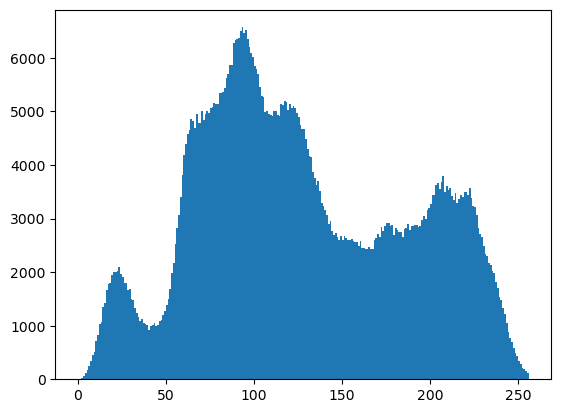

In [254]:
import matplotlib.pyplot as plt

hist, bins = np.histogram(noisy_img.ravel(), 256, [0,256])
plt.hist(noisy_img.ravel(), 256, [0,256])
plt.show()

Histogram For watermarked image

In [255]:
img2 = cv2.imread('watermarked_image2.png')

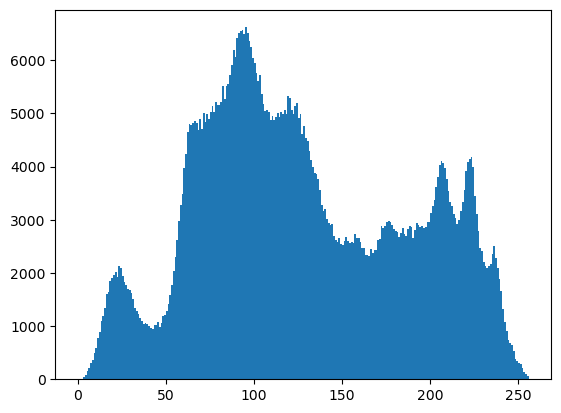

In [256]:
import matplotlib.pyplot as plt

hist, bins = np.histogram(img2.ravel(), 256, [0,256])
plt.hist(img2.ravel(), 256, [0,256])
plt.show()

Histogram For original image

In [257]:
img1 = cv2.imread('PeppersRGB.bmp')

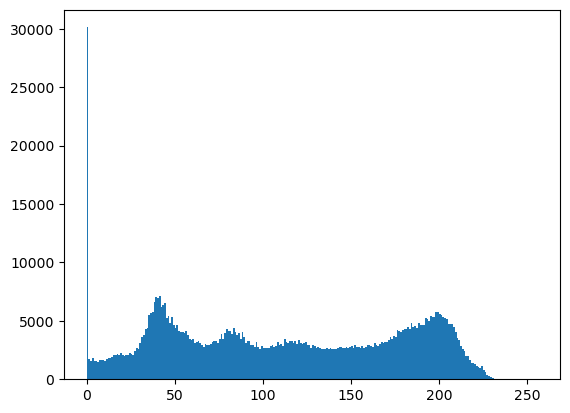

In [258]:

hist, bins = np.histogram(img1.ravel(), 256, [0,256])
plt.hist(img1.ravel(), 256, [0,256])
plt.show()